In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
import numpy as np
print(X_train_full.shape)
print(y_train_full.shape)
print(np.unique(y_train_full))
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
(10000,)


1.0
y_valid:  (5000,)
y_train:  (55000,)


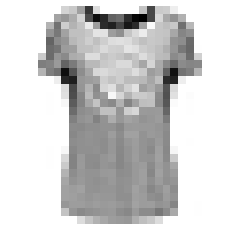

0


In [4]:
"""X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0"""



X_valid = X_train_full[:5000]/255.0 
X_train = X_train_full[5000:]/255.0
print(X_train.max())
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0
print('y_valid: ', y_valid.shape)
print('y_train: ', y_train.shape)

plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()
print(y_train[1])

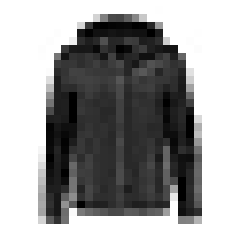

4


In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
print(y_train[0])

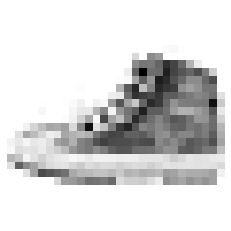

7


In [9]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()
print(y_train[2])

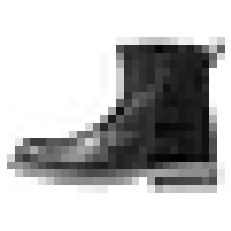

9


In [8]:
plt.imshow(X_train[3], cmap="binary")
plt.axis('off')
plt.show()
print(y_train[3])

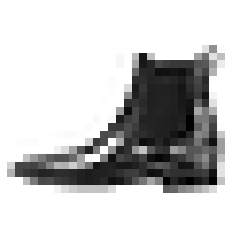

9


In [10]:
plt.imshow(X_train[5], cmap="binary")
plt.axis('off')
plt.show()
print(y_train[5])

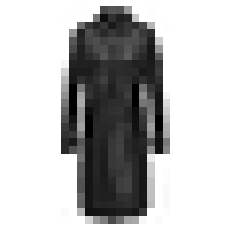

4


In [11]:
plt.imshow(X_train[6], cmap="binary")
plt.axis('off')
plt.show()
print(y_train[6])

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
# fetch a layer by its index
hidden1 = model.layers[1]
# fetch it by name:
hidden1.name

'dense'

In [19]:
weights, biases = hidden1.get_weights()
print(weights)
print(biases)

[[ 0.0130253  -0.04668665 -0.0326743  ...  0.0278345  -0.05745358
   0.01939466]
 [ 0.05261728 -0.0742428  -0.01641562 ... -0.06257495 -0.05673962
   0.0414772 ]
 [ 0.0522134   0.00655169  0.05107301 ... -0.07433516 -0.03599177
   0.01972613]
 ...
 [-0.02657311  0.03704964  0.03077336 ... -0.0245836   0.06701672
   0.05574612]
 [-0.01286997  0.0304784  -0.03973677 ...  0.06265315 -0.04701262
   0.02090188]
 [-0.02228435  0.00705763 -0.04129901 ...  0.05464709 -0.00027316
  -0.05676651]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [21]:
# After a model is created, call its compile() method to specify the less function and the optimizer to use
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7199 - accuracy: 0.7646 - val_loss: 0.4930 - val_accuracy: 0.8390
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4903 - accuracy: 0.8301 - val_loss: 0.4736 - val_accuracy: 0.8380
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8459 - val_loss: 0.4286 - val_accuracy: 0.8484
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8548 - val_loss: 0.3932 - val_accuracy: 0.8690
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3953 - accuracy: 0.8623 - val_loss: 0.3784 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8664 - val_loss: 0.3781 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3669 - accuracy: 0.8699 - val_loss: 0.3673 - val_accuracy:

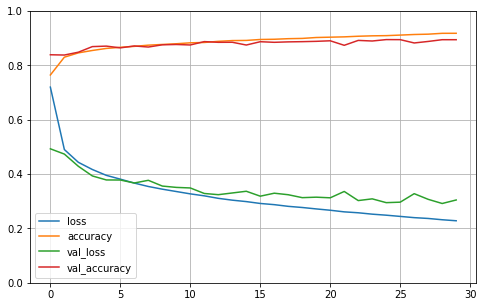

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8828


[0.33778658509254456, 0.8827999830245972]

In [25]:
# Using the model to make predictions
# Use the first three instances of he test set
X_new = X_test[:3]
y_prob =model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')